## Importing The Libaries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [33]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [34]:
US_comments = pd.read_csv('./data/UScomments.csv', on_bad_lines = "skip")
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Data analysis and Data Cleaning

In [35]:
US_comments.shape

(691400, 4)

In [36]:
US_comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [37]:
US_comments.dropna(inplace=True)

In [38]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [39]:
US_comments.shape

(691374, 4)

In [40]:
US_comments.nunique()

video_id          2266
comment_text    434075
likes             1284
replies            479
dtype: int64

In [41]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  object
 3   replies       691374 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [42]:
## Null row
US_comments.drop(41587, inplace=True)

In [43]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [44]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [45]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [46]:
US_comments.shape

(691373, 4)

In [47]:
US_comments = US_comments.sample(n=10000, random_state=84)
US_comments.reset_index(drop=True, inplace=True)
US_comments.shape

(10000, 4)

In [48]:
US_comments.head()

,video_id,comment_text,likes,replies
0,l864IBj7cgw,Where is katniss?,0,0
1,RyCDmg1JXcQ,Group 2？\n\nSuper gt GT 500 car？,0,0
2,dt__kig8PVU,I bet the dogs are really humans who got the ...,1,0
3,wqcHGWG8MLQ,No slice? Nooooo 😢,0,1
4,CX4KuIBmnjI,Wait...what happened in the beginning,0,0


### Converting emoji's to text

### Converting emoticon to text

### Removing Punctuations, Numbers and Special Characters.

In [49]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

### Removing Short Words.

In [50]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### Changing the text to lower case.

In [51]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

### Tokenization

In [52]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                    [where, katniss?]
1                           [group, 2？\n\nsuper, car？]
2    [dogs, really, humans, that, turned, them, int...
3                                     [slice?, nooooo]
4                   [wait...what, happened, beginning]
Name: comment_text, dtype: object

## Lemmatization

In [53]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [54]:
!nltk.download('stopwords')

'nltk.download' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
wnl = WordNetLemmatizer()

In [56]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

0                                    [where, katniss?]
1                           [group, 2？\n\nsuper, car？]
2    [dogs, really, humans, that, turned, them, int...
3                                     [slice?, nooooo]
4                   [wait...what, happened, beginning]
Name: comment_text, dtype: object

In [57]:
tokenized_tweet

0                                       [where, katniss?]
1                              [group, 2？\n\nsuper, car？]
2       [dogs, really, humans, that, turned, them, int...
3                                        [slice?, nooooo]
4                      [wait...what, happened, beginning]
                              ...                        
9995    [long, before, this, deals, with, child, prote...
9996    [current, george, michael...., beautiful, voic...
9997                                        [suweeeeeet!]
9998         [this.is, bullshit., that, doesn't, matter.]
9999    [christen!, praying, your, family, that, live,...
Name: comment_text, Length: 10000, dtype: object

In [58]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [59]:
US_comments['comment_text'] = tokenized_tweet

In [60]:
US_comments['comment_text'].head()

0                                   where katniss?
1                           group 2？\n\nsuper car？
2    dogs really humans that turned them into dogs
3                                    slice? nooooo
4                   wait...what happened beginning
Name: comment_text, dtype: object

## Let's do the Sentiment Analysis on the US Comments Dataset

### Using NLTK

In [61]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [63]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [64]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,l864IBj7cgw,where katniss?,0,0,0.0
1,RyCDmg1JXcQ,group 2？\n\nsuper car？,0,0,0.0
2,dt__kig8PVU,dogs really humans that turned them into dogs,1,0,0.0
3,wqcHGWG8MLQ,slice? nooooo,0,1,0.0
4,CX4KuIBmnjI,wait...what happened beginning,0,0,0.0


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [65]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [66]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,l864IBj7cgw,where katniss?,0,0,0.0,Neutral
1,RyCDmg1JXcQ,group 2？\n\nsuper car？,0,0,0.0,Neutral
2,dt__kig8PVU,dogs really humans that turned them into dogs,1,0,0.0,Neutral
3,wqcHGWG8MLQ,slice? nooooo,0,1,0.0,Neutral
4,CX4KuIBmnjI,wait...what happened beginning,0,0,0.0,Neutral


In [67]:
US_comments.Sentiment.value_counts()

Sentiment
Positive    4295
Neutral     3857
Negative    1848
Name: count, dtype: int64

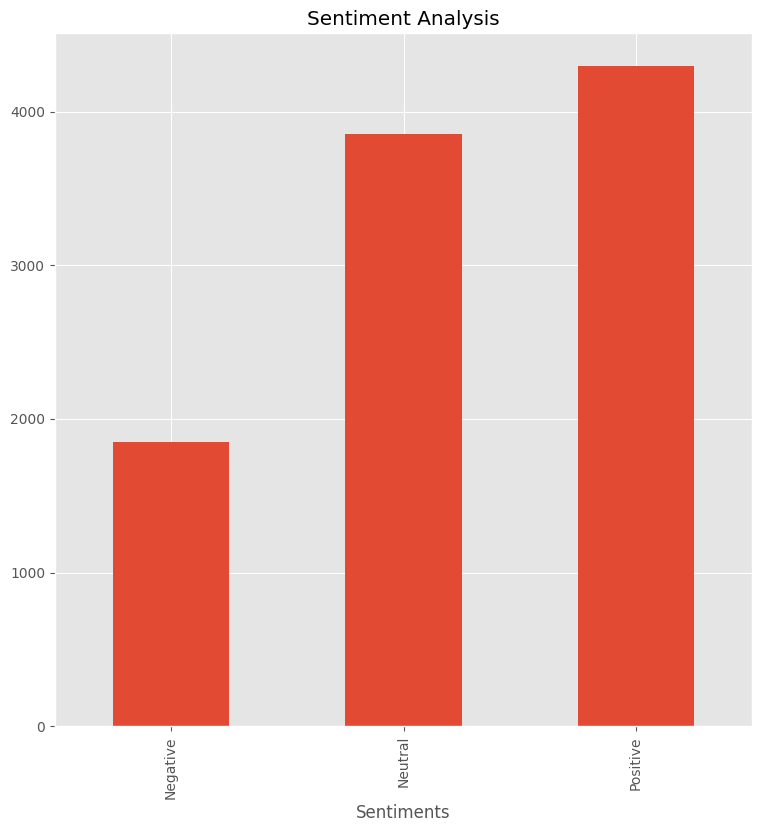

In [68]:
ax = US_comments.Sentiment.value_counts().sort_index().plot(kind = 'bar', title = 'Sentiment Analysis', figsize = (9,9))
ax.set_xlabel('Sentiments')
plt.show()

## Wordcloud of all the comments to see the most frequent comments.

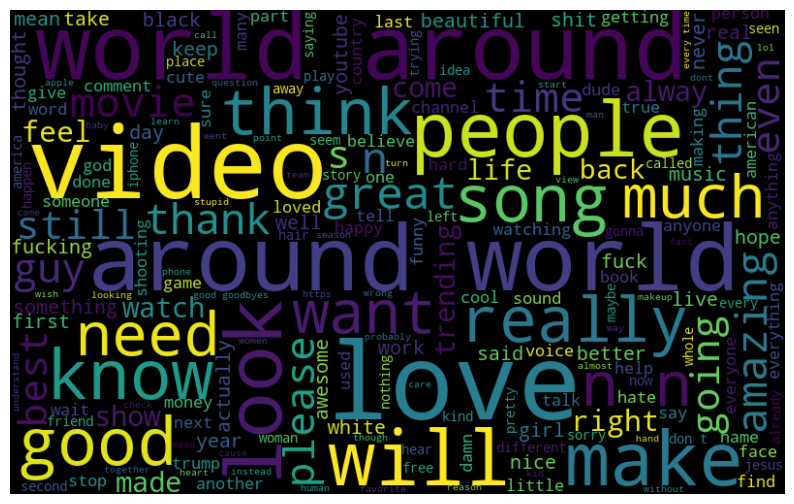

In [72]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud of Positive Comments

In [73]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

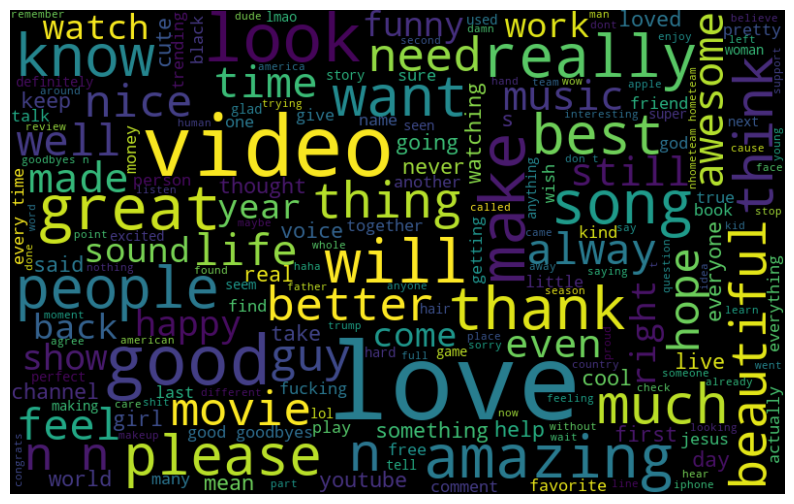

In [74]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud of Negative Comments

In [75]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

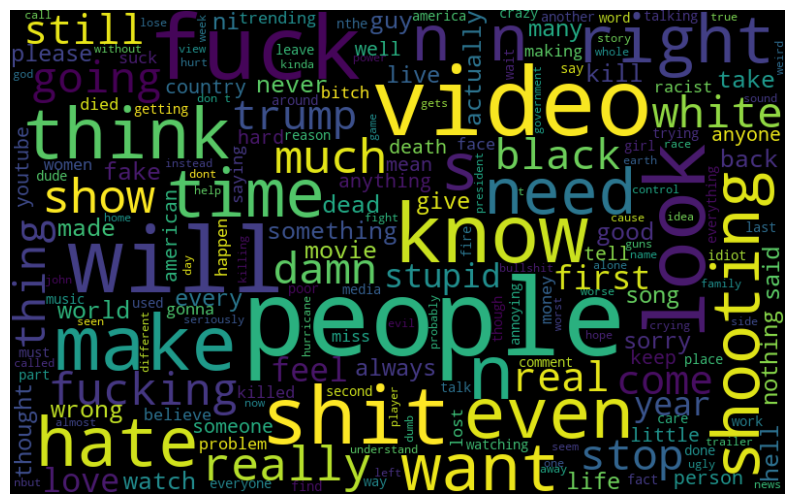

In [76]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud of Neutral Comments

In [77]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

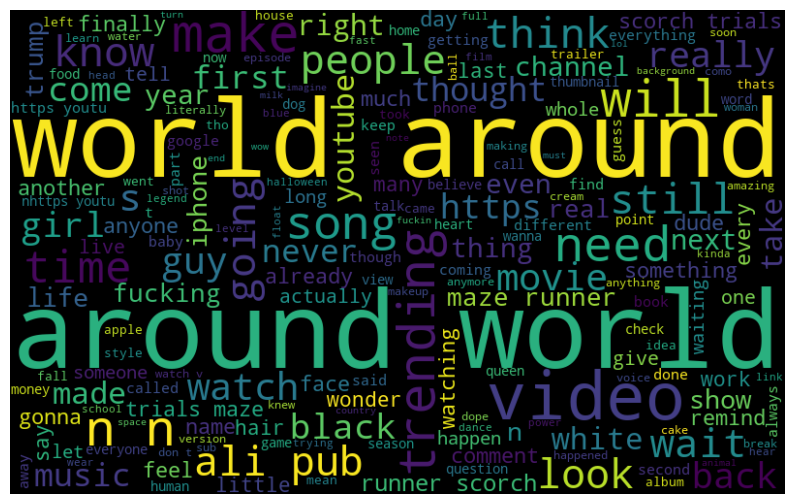

In [78]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

# Using Pretrained Hugging Face Models

In [1]:
from transformers import pipeline

D:\Setups\Anaconda\envs\youtube\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = ["who made him teacher, can't understand anything", "resources are not provided", "I love you", "I hate you"]
print(data)

["who made him teacher, can't understand anything", 'resources are not provided', 'I love you', 'I hate you']


In [3]:
sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
model.safetensors: 100%|████████████████████████████████████████████████████████████| 268M/268M [00:27<00:00, 9.60MB/s]
D:\Setups\Anaconda\envs\youtube\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abhis\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingfa

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
tokenizer_config.json: 100%|████████████████████████████████████████████████████████████████| 48.0/48.0 [00:00<?, ?B/s]
vocab.txt: 100%|█████████████████████████████████████████████████████████████████████| 232k/232k [00:00<00:00, 569kB/s]


[{'label': 'NEGATIVE', 'score': 0.9993038177490234},
 {'label': 'NEGATIVE', 'score': 0.9991071820259094},
 {'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [4]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(data)

config.json: 100%|████████████████████████████████████████████████████████████████████████████| 949/949 [00:00<?, ?B/s]
D:\Setups\Anaconda\envs\youtube\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abhis\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-de

[{'label': 'NEG', 'score': 0.9711329936981201},
 {'label': 'NEG', 'score': 0.6859284043312073},
 {'label': 'POS', 'score': 0.9903132915496826},
 {'label': 'NEG', 'score': 0.9797351360321045}]